Vamos a ver principalmente dos tipos de algorimtos

1- K-Means

2- Hierarchical Clustering (Método Jerárquico Conglomerado)

Para ambos vamos usar un dataset que se autogenera con una función a la que se le indica directamente cuantos clusters deseas, cuantas filas y cuantas columnas o predictores.

In [29]:
from sklearn.datasets.samples_generator import make_blobs
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
sb.set_style("whitegrid")
%matplotlib inline

In [67]:
X, y = make_blobs(n_samples=2000, centers=4, n_features=5,
                   random_state=0)

In [13]:
X.shape

(2000, 5)

In [14]:
y.shape

(2000,)

In [18]:
X[0],y[0]

(array([  6.03436026,   1.23507723,   2.05136944,   9.47088439,
        -10.90134605]), 2)

# K-means

a) Separación de grupo de test y de entrenamiento

In [35]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y, 
                                                    random_state=667, 
                                                    test_size=0.25)

b) Elección del número de clusters

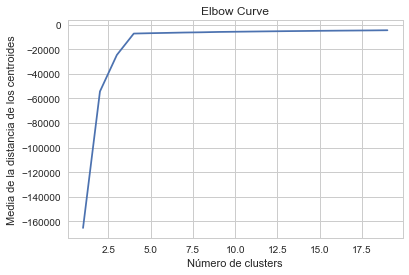

In [37]:
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin_min
Nc = range(1, 20)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(X_train).score(X_train) for i in range(len(kmeans))]
score
plt.plot(Nc,score)
plt.xlabel('Número de clusters')
plt.ylabel('Media de la distancia de los centroides')
plt.title('Elbow Curve')

Claramente el valor es 4

c) Creación del modelo y prediccion en el grupo de test

In [40]:
modInit = KMeans(n_clusters=4)
mod = modInit.fit(X_train)

In [42]:
y_test_hat = mod.predict(X_test)

d) Evaluación del método

Podemos hacer algo similar a lo que se hace en un método de clasificación. Usamos la matriz 
de confusion

In [48]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_test_hat)
cm

array([[  0, 128,   0,   0],
       [  0,   0, 123,   0],
       [  0,   0,   0, 124],
       [125,   0,   0,   0]])

> **Nota:** Recuerda que este es un ejemplo de juguete y que en la realidad cuando haces segmentación
    no sabes cuáles son los grupos en realidad por lo que no podrás comparar con nada. 

Visualización de los clusters:

number of estimated clusters : 4


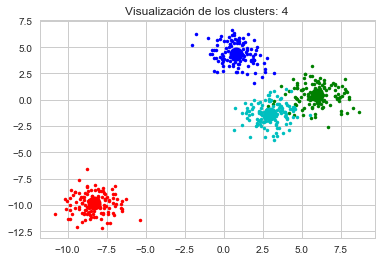

In [71]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth

# #############################################################################
# Compute clustering with MeanShift

X = X_test
y= y_test_hat
# The following bandwidth can be automatically detected using
bandwidth = estimate_bandwidth(X, quantile=0.2, n_samples=500)

ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

labels_unique = np.unique(labels)
n_clusters_ = len(labels_unique)

print("number of estimated clusters : %d" % n_clusters_)

# #############################################################################
# Plot result
import matplotlib.pyplot as plt
from itertools import cycle

plt.figure(1)
plt.clf()

colors = cycle('bgrcmykbgrcmykbgrcmykbgrcmyk')
for k, col in zip(range(n_clusters_), colors):
    my_members = labels == k
    cluster_center = cluster_centers[k]
    plt.plot(X[my_members, 0], X[my_members, 1], col + '.')
    plt.plot(cluster_center[0], cluster_center[1], 'o', markerfacecolor=col,
             markeredgecolor='k', markersize=14)
plt.title('Visualización de los clusters: %d' % n_clusters_)
plt.show()

# Métodos jerárquicos

Vamos a tomar ahora un ejemplo con menos individuos para hacrlo más visual, digamos 20,

In [58]:
X, y = make_blobs(n_samples=20, centers=4, n_features=3,
                   random_state=0)

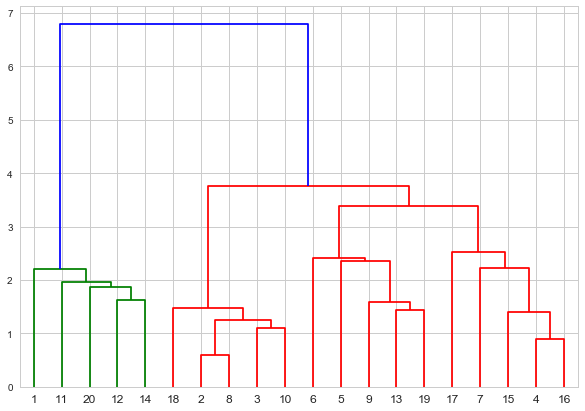

In [64]:
from scipy.cluster.hierarchy import dendrogram, linkage  
from matplotlib import pyplot as plt

linked = linkage(X, 'single')

labelList = range(1, 21)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  

Tenemos dos parámetros claves aquí:
    
1) El tipo de distancia o similitud: que por defecto es la distancia euclidea, pero podría ser la distancia de Jaccard, o la correlación o la de MiKowski. Más infor la podeís encontrar [aquí](https://docs.scipy.org/doc/scipy/reference/generated/scipy.spatial.distance.pdist.html)

2) EL tipo de conglomerado: single, complete, average, ward, etc... Puedes encontrar detallada información de cada uno de ellos [aquí](https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.cluster.hierarchy.linkage.html)

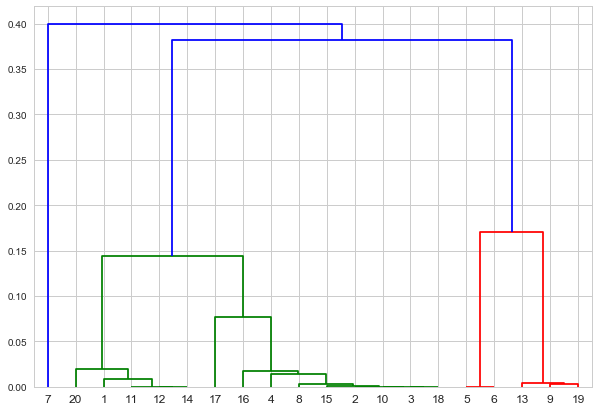

In [63]:
linked = linkage(X, 'single',metric='correlation')

labelList = range(1, 21)

plt.figure(figsize=(10, 7))  
dendrogram(linked,  
            orientation='top',
            labels=labelList,
            distance_sort='descending',
            show_leaf_counts=True)
plt.show()  